<a href="https://colab.research.google.com/github/tiiaraans/PCVK_ganjil_2023/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


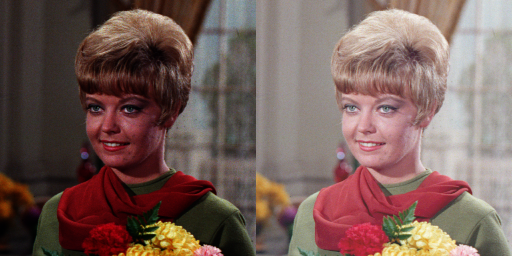

In [20]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Simulasi Image Depth 
----------------------
Masukkan nilai bit depth [1-7]: 7


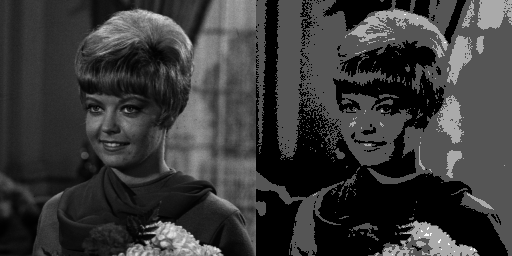

In [22]:
original = cv.imread('/content/drive/MyDrive/female.tiff', cv.IMREAD_GRAYSCALE) 
depth_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth ')
print('----------------------')
try:
  bd = float(input('Masukkan nilai bit depth [1-7]: '))
except ValueError:
  print('Error, not a number')

bit = 2
level = 255 / (pow(2,bit)-1) 

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255);
     

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 5
Nilai PSNR = 27.53506064976968 dB


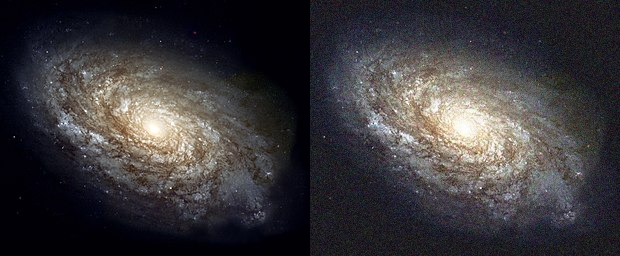

In [25]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[4]

for i in range(4):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 5')
print('Nilai PSNR =', psnr, 'dB')

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Nilai PSNR adalah 27.51812252262079 (dB)


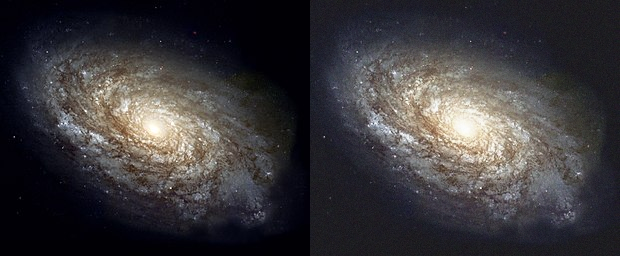

In [27]:
#citra 60
dst = cv_img[0]
noise_number = 29 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.510054555834564 (dB)


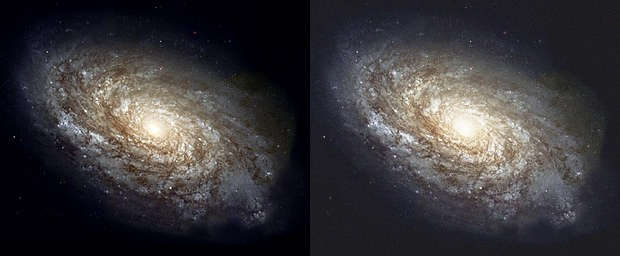

In [28]:
# citra 80

dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.51333187802352 (dB)


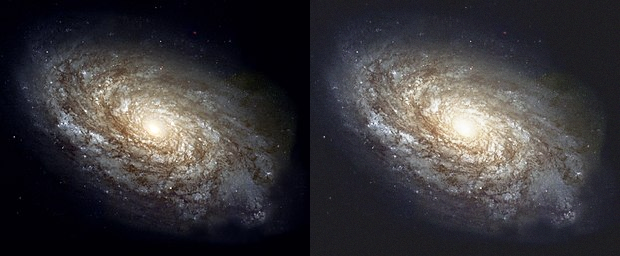

In [29]:
# (citra 100)

dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

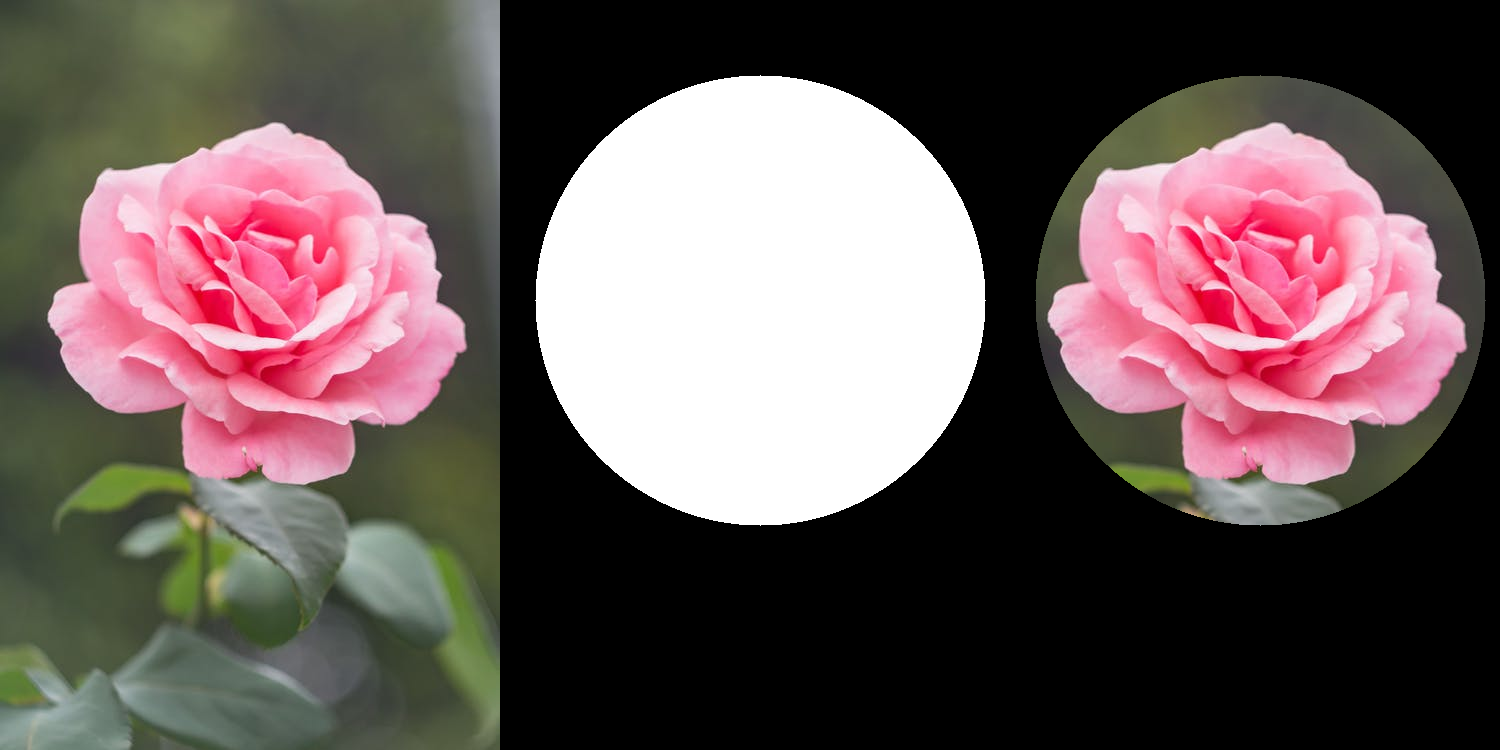

In [31]:
# Contoh operator AND
img_rose = cv.imread('/content/drive/MyDrive/rose_pink.png')

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

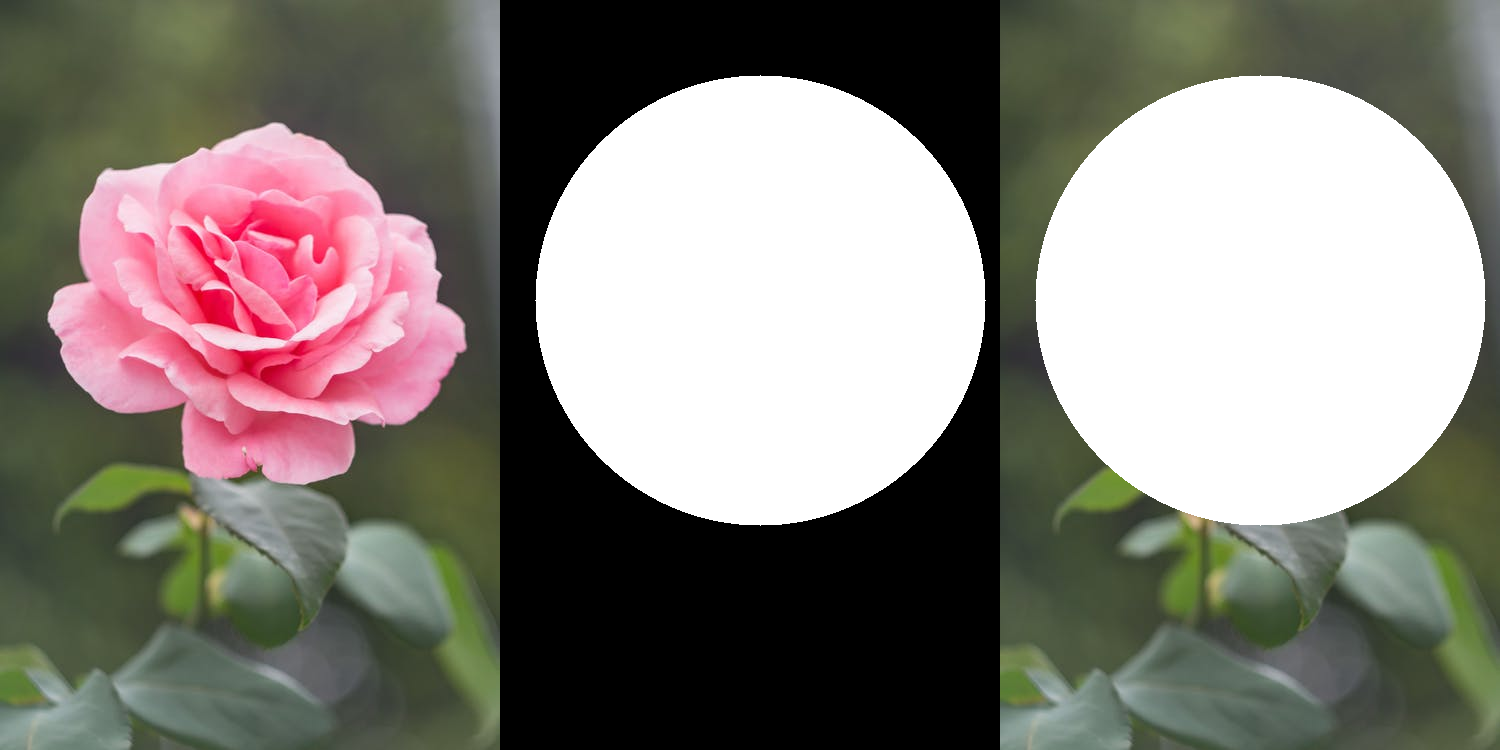

In [32]:
# (OR)

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)
     


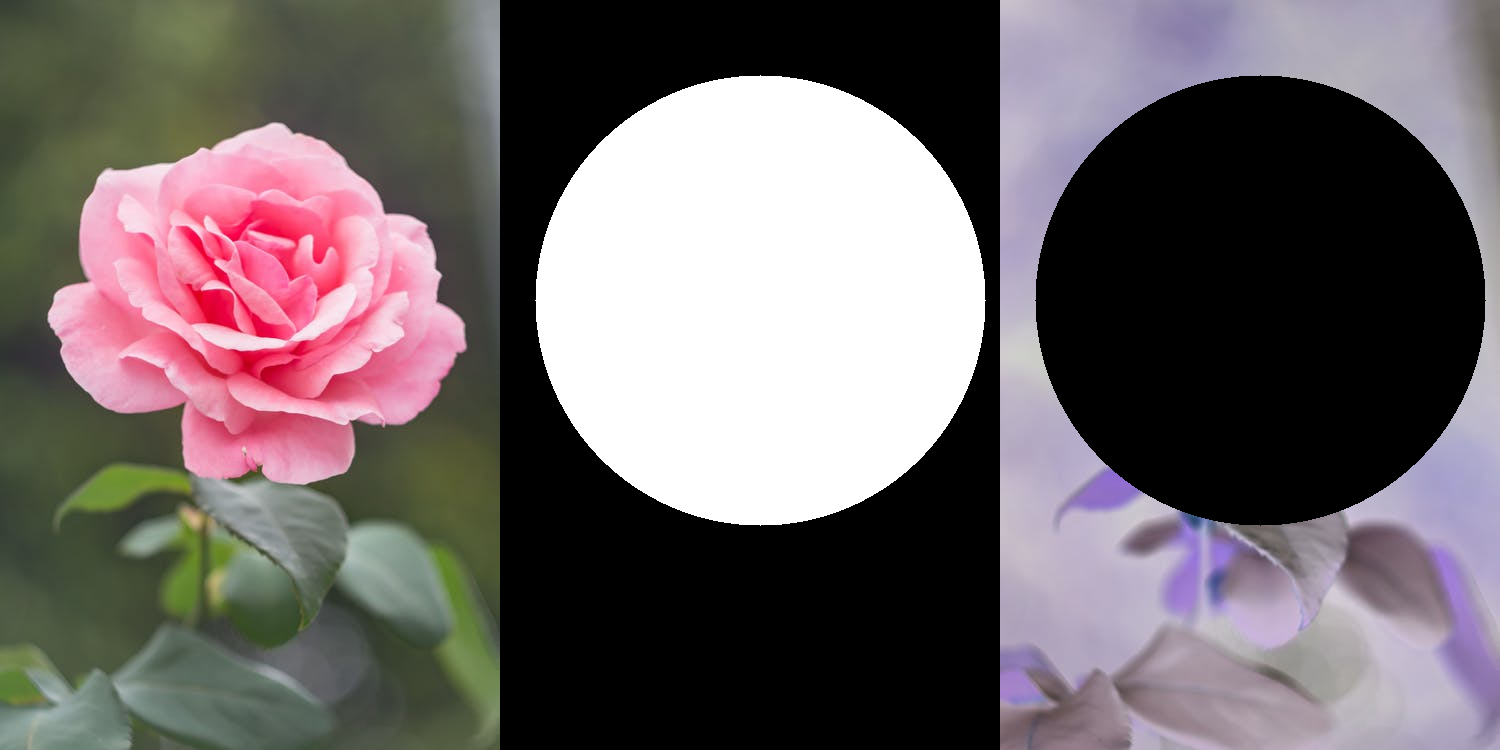

In [33]:
# (NOT)

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & ~mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

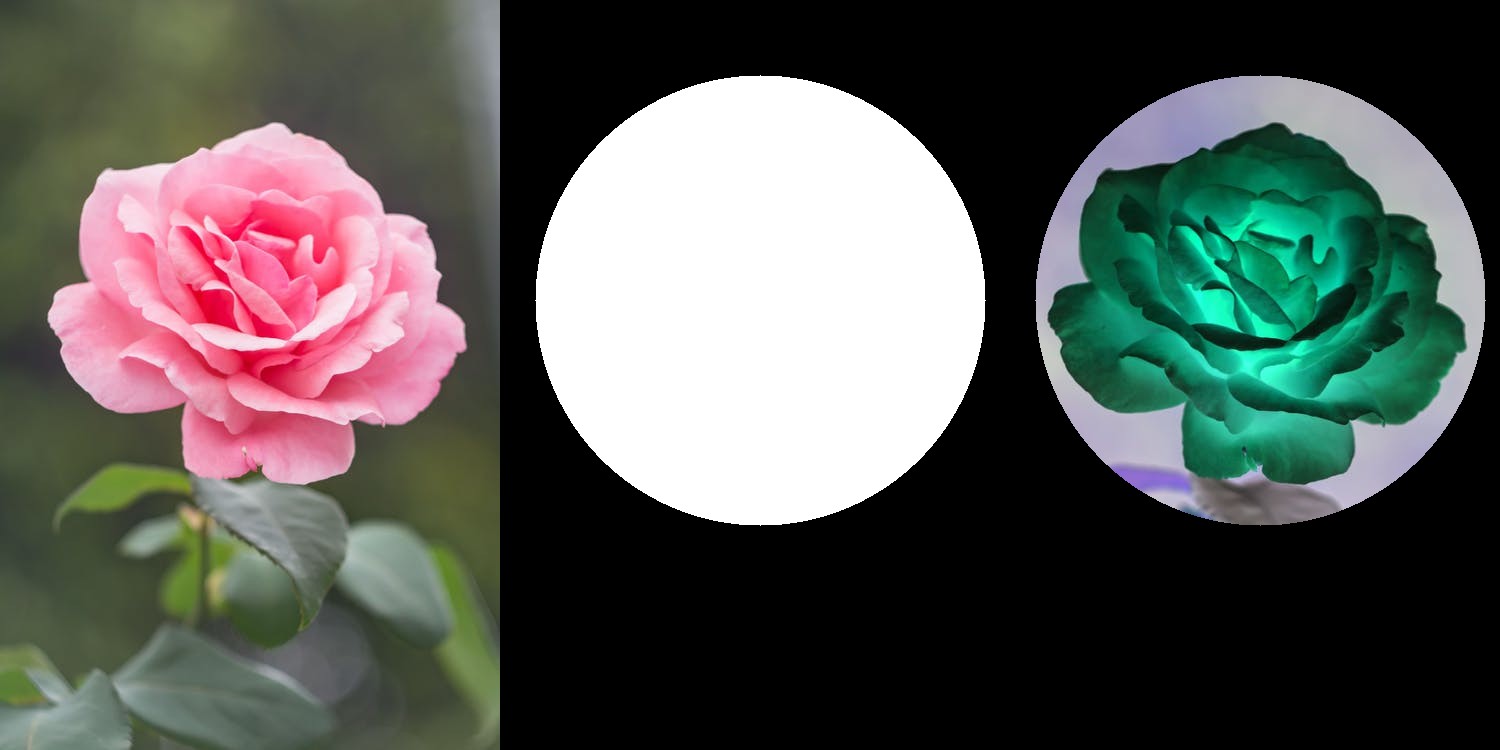

In [34]:
#(NAND atau NOT AND)

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

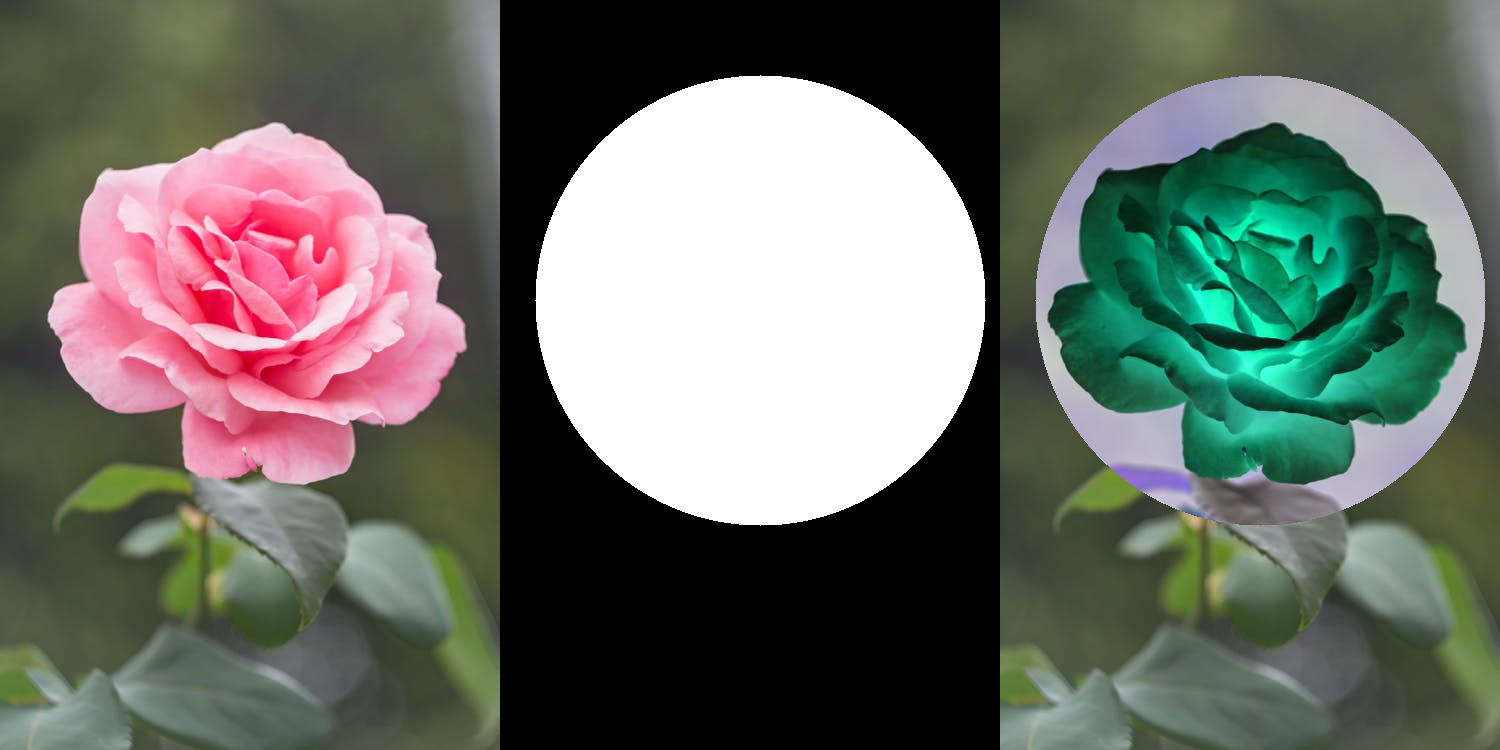

In [35]:
# (XOR atau Exclusive OR)

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

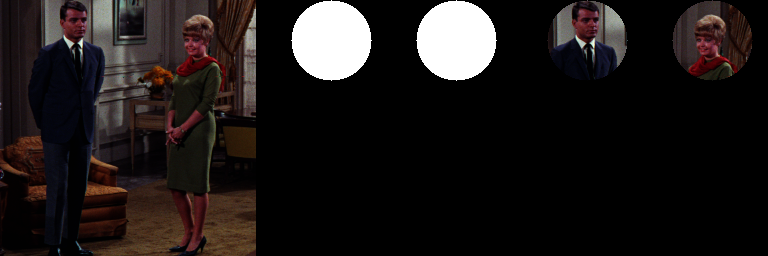

In [37]:
#NO 4
img_t = cv.imread('/content/drive/MyDrive/couple.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = img_t & mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = img_t & mask1

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)